<a href="https://colab.research.google.com/github/DheerajDinesh/CognoRise_Infotech/blob/Data_Science/CREDIT_CARD_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount). The dataset is a highly imbalanced dataset.

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/drive/MyDrive/CognoRise Infotech/Data_Science/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [160]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [161]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [162]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [163]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [164]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

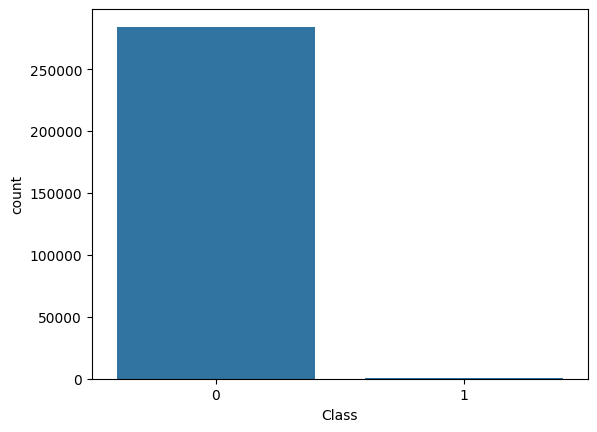

In [165]:
sns.countplot(x='Class',data=df)

([<matplotlib.patches.Wedge at 0x796de2252620>,
 [Text(-1.09998380137016, 0.0059696501784341355, '0'),
  Text(1.0999838018177286, -0.005969567707642625, '1')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.83%'),
  Text(0.5999911646278518, -0.0032561278405323405, '0.17%')])

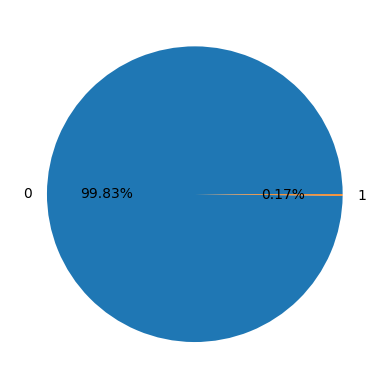

In [166]:
plt.pie(df['Class'].value_counts(),labels=['0','1'],autopct='%0.2f%%')

# data is highly imbalanced

In [167]:
# time and amount has not gone through PCA transformation (dimension reduction),
# so scaling is done

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()  # robustscaler less prone to outliers
df['scaled_amount']=scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time']=scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis=1,inplace=True)

In [168]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


In [169]:
from sklearn.model_selection import KFold,StratifiedKFold,StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,1), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,1), '% of the dataset')
x1=df.drop('Class',axis=1)
x = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, shuffle=False)

for train_index, test_index in sss.split(x, y):
    print("Train:", train_index, "Test:", test_index)
    original_xtrain, original_xtest = x.iloc[train_index], x.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# original_xtrain, original_xtest, original_ytrain, original_ytest = train_test_split(x, y, test_size=0.2, random_state=42)

No Frauds 99.8 % of the dataset
Frauds 0.2 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [170]:
# Check the Distribution of the labels

# Turn into an array
original_xtrain = original_xtrain.values
original_xtest = original_xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print('Train', train_counts_label/ len(original_ytrain))
print('Test', test_counts_label/ len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

Train [0.99827076 0.00172924]
Test [0.99827952 0.00172048]


Random UnderSampling

In [171]:
# Bring down the Non-Fraud class to the same amount as the Fraud class

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

under_distributed_df = pd.concat([fraud_df, non_fraud_df])

# under_distributed_df contains 492 non-fraud rows and 492 fraud rows
# Shuffle dataframe rows
new_df = under_distributed_df.sample(frac=1, random_state=42)

new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

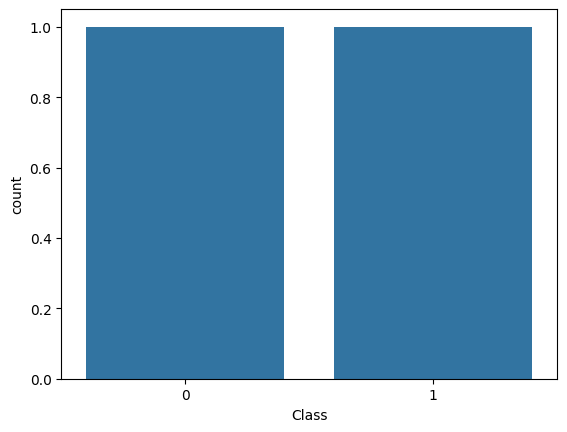

In [172]:
sns.countplot(new_df['Class'].value_counts())

<Axes: >

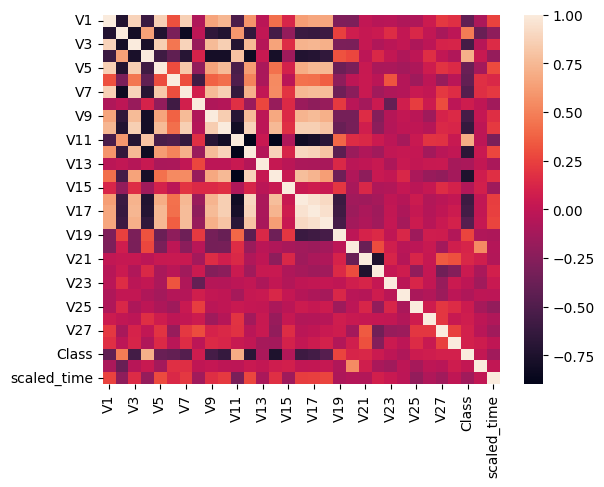

In [173]:
sns.heatmap(new_df.corr())

In [174]:
new_df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
V1,1.000000,-0.721201,0.874870,-0.607601,0.862547,0.307441,0.859482,-0.078181,0.651970,0.733576,...,-0.041273,-0.038323,-0.075877,-0.079790,0.054061,0.208085,0.174894,-0.419081,-0.095715,0.254760
V2,-0.721201,1.000000,-0.797245,0.639591,-0.728224,-0.306088,-0.834850,-0.015737,-0.656685,-0.725534,...,0.044421,0.160300,0.008577,0.131341,0.004953,-0.110445,-0.017052,0.480572,-0.390129,-0.216826
V3,0.874870,-0.797245,1.000000,-0.768065,0.853853,0.452462,0.876641,-0.172592,0.758032,0.857837,...,-0.073688,-0.024950,0.007388,-0.089274,-0.017582,0.104102,0.114814,-0.562955,-0.041453,0.147757
V4,-0.607601,0.639591,-0.768065,1.000000,-0.583041,-0.427505,-0.700306,0.103974,-0.789895,-0.794482,...,0.138111,0.008506,-0.080733,-0.015708,0.165945,0.001730,-0.072943,0.705961,0.029330,-0.189826
V5,0.862547,-0.728224,0.853853,-0.583041,1.000000,0.295094,0.822829,-0.202883,0.658730,0.760277,...,-0.099499,-0.093759,-0.124157,-0.089946,0.061282,0.189387,0.147048,-0.380024,-0.125240,0.282992
V6,0.307441,-0.306088,0.452462,-0.427505,0.295094,1.000000,0.296829,-0.573081,0.369649,0.428785,...,-0.024020,0.322894,-0.053790,-0.146293,-0.015535,-0.184135,-0.036697,-0.409577,0.176513,0.132921
V7,0.859482,-0.834850,0.876641,-0.700306,0.822829,0.296829,1.000000,0.086222,0.760002,0.855506,...,-0.142127,-0.081380,-0.057634,0.038560,0.013523,0.212159,0.161335,-0.478148,0.165306,0.213812
V8,-0.078181,-0.015737,-0.172592,0.103974,-0.202883,-0.573081,0.086222,1.000000,-0.080956,-0.053931,...,0.044388,-0.402132,0.075882,0.231305,0.054404,0.293100,-0.017169,0.059750,-0.001430,-0.141166
V9,0.651970,-0.656685,0.758032,-0.789895,0.658730,0.369649,0.760002,-0.080956,1.000000,0.845181,...,-0.266815,-0.047196,0.007105,-0.025513,-0.147896,0.108647,0.146574,-0.550848,0.015237,0.167877
V10,0.733576,-0.725534,0.857837,-0.794482,0.760277,0.428785,0.855506,-0.053931,0.845181,1.000000,...,-0.228712,-0.054568,-0.008644,-0.003182,-0.050558,0.135503,0.122805,-0.629134,-0.014565,0.215757


In [175]:
# New_df is from the random undersample data (fewer instances)

x = new_df.drop('Class', axis=1).values
y = new_df['Class'].values

In [176]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [177]:
x_train.shape

(688, 30)

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
forest=RandomForestClassifier()
reg=LogisticRegression()
lst=[forest,reg]
labels=['No Fraud', 'Fraud']

In [179]:
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('Accuracy score is ',accuracy_score(y_test,y_pred))
  print('Classification Report :')
  print(classification_report(y_test,y_pred,target_names=labels))
  print('*'*100)

RandomForestClassifier()
Accuracy score is  0.9222972972972973
Classification Report :
              precision    recall  f1-score   support

    No Fraud       0.85      1.00      0.92       134
       Fraud       1.00      0.86      0.92       162

    accuracy                           0.92       296
   macro avg       0.93      0.93      0.92       296
weighted avg       0.93      0.92      0.92       296

****************************************************************************************************
LogisticRegression()
Accuracy score is  0.9256756756756757
Classification Report :
              precision    recall  f1-score   support

    No Fraud       0.87      0.99      0.92       134
       Fraud       0.99      0.88      0.93       162

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

***************************************************************************

In [180]:
under_accuracy=accuracy_score(y_test,y_pred)
under_accuracy

0.9256756756756757

In [181]:
under_report=classification_report(y_test,y_pred,target_names=labels)
print(under_report)

              precision    recall  f1-score   support

    No Fraud       0.87      0.99      0.92       134
       Fraud       0.99      0.88      0.93       162

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



OverSampling using SMOTE

In [182]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority',random_state = 42)

x_train_oversampled, y_train_oversampled = sm.fit_resample(original_xtrain, original_ytrain)
x_test_oversampled, y_test_oversampled = sm.fit_resample(original_xtest, original_ytest)

In [183]:
x_train_oversampled

array([[-1.35980713e+00, -7.27811733e-02,  2.53634674e+00, ...,
        -2.10530535e-02,  1.78327395e+00, -9.94983494e-01],
       [ 1.19185711e+00,  2.66150712e-01,  1.66480113e-01, ...,
         1.47241692e-02, -2.69824635e-01, -9.94983494e-01],
       [-1.35835406e+00, -1.34016307e+00,  1.77320934e+00, ...,
        -5.97518406e-02,  4.98372109e+00, -9.94971745e-01],
       ...,
       [-7.69402716e-01,  2.14997900e+00, -2.65794872e+00, ...,
         2.64525191e-01, -3.04057639e-01, -3.57994736e-01],
       [-1.14164405e+01,  7.08483671e+00, -1.55996461e+01, ...,
        -8.45035923e-02, -7.75129883e-02,  1.09138594e-01],
       [ 5.71076584e-01,  2.45505799e+00, -5.45430262e+00, ...,
         1.53077582e-01, -2.93439530e-01, -8.99665986e-01]])

In [184]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_oversampled,y_train_oversampled)
y_pred=knn.predict(x_test_oversampled)

In [185]:
over_accuracy=accuracy_score(y_test_oversampled,y_pred)
over_accuracy

0.9006823417688128

In [186]:
over_report=classification_report(y_test_oversampled,y_pred)
print(over_report)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91     56863
           1       1.00      0.80      0.89     56863

    accuracy                           0.90    113726
   macro avg       0.92      0.90      0.90    113726
weighted avg       0.92      0.90      0.90    113726



Modelling the Original Data


In [187]:
forets=RandomForestClassifier()
regr=LogisticRegression()
lst=[forets,regr]
labels=['No Fraud', 'Fraud']

In [188]:
for i in lst:
  print(i)
  i.fit(original_xtrain,original_ytrain)
  y_pred=i.predict(original_xtest)
  original_accuracy=accuracy_score(original_ytest,y_pred)
  print('Accuracy score is ', original_accuracy)
  original_report=classification_report(original_ytest,y_pred,target_names=labels)
  print('Classification Report :')
  print(original_report)
  print('*'*100)

RandomForestClassifier()
Accuracy score is  0.9994557679816014
Classification Report :
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.99      0.69      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

****************************************************************************************************
LogisticRegression()
Accuracy score is  0.9990519829356929
Classification Report :
              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.94      0.48      0.64        98

    accuracy                           1.00     56961
   macro avg       0.97      0.74      0.82     56961
weighted avg       1.00      1.00      1.00     56961

***************************************************************************

In [189]:
original_accuracy

0.9990519829356929

In [190]:
print(original_report)

              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56863
       Fraud       0.94      0.48      0.64        98

    accuracy                           1.00     56961
   macro avg       0.97      0.74      0.82     56961
weighted avg       1.00      1.00      1.00     56961



In [209]:
model_lst=[reg,knn,forets]
pred_value=original_xtest[7:8]
lst=[0,1,2]
lst1=[]
j=0
for i in model_lst:
  lst[j]=i.predict(pred_value)
  if lst[j]==0:
    lst1.append('No Fraud')
  else:
    lst1.append('Fraud')
  j+=1

In [211]:
original_ytest[7]

1

In [210]:
print('Underfitted prediction :',lst1[0])
print('Overfitted prediction :',lst1[1])
print('Original prediction :',lst1[2])

Underfitted prediction : Fraud
Overfitted prediction : No Fraud
Original prediction : No Fraud


In this prediction, only the undersampled model had the correct prediction